# Higgs hunting - an example of scientific research

The data we use here are actual, meaningful data from the CMS experiment that confirmed the existence of this elusive particle, which then resulted in a Nobel prize. Instead of hiding somewhere under ready made graphs, it is now yours to explore. The example is based on the original code in [http://opendata.cern.ch/record/5500] on the CERN Open Data portal (Jomhari, Nur Zulaiha; Geiser, Achim; Bin Anuar, Afiq Aizuddin; (2017). Higgs-to-four-lepton analysis example using 2011-2012 data. CERN Open Data Portal. DOI:10.7483/OPENDATA.CMS.JKB8.RR42) and the initial "notebook version" by Tom McCauley (University of Notre Dame) and Peitsa Veteli (Helsinki Institute of Physics).

We consider the fairly background-free final state in which the Higgs boson decay is by first creating two Z bosons that then decay further into four leptons (electrons, muons...). For the Higgs boson signal we look at the invariant mass distribution of the four leptons and expect a peak over the background at around the mass of the Higgs boson.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# Data for later use.

csvs = [pd.read_csv('../../Data/4mu_2011.csv'), pd.read_csv('../../Data/4e_2011.csv'), pd.read_csv('../../Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('../../Data/4mu_2012.csv'), pd.read_csv('../../Data/4e_2012.csv'), pd.read_csv('../../Data/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

In [9]:
# Choose a mass region to analyse the experimental data and create a histogram of the invariant mass distribution from the input

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

For simplicity, we take pre-simulated values for background (and Higgs signal) events that have already been weighted by luminosity, cross-section and number of events. Basically we create a set of values that have some randomness in them, just like a real measurement would have, but which follows the distribution that has been observed in those processes.

In [10]:
# DY, some irreducible background from singular Z bosons.
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
# ttbar, a pair of top and anti-top quarks.
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
# ZZ, a pair of "real" Z bosons.
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
#our Higgs signal for a specific mass of the Higgs boson
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])


Here, most of the work is already done for you:
Run the cell to look at the invariant mass distribution of the background processes considered here. Why do we see a peak around 90 GeV?

In a second step: Please complete the entry for "Measured data" using what we prepared earlier in the notebook (and/or calculate in the beginning of the following cell). How well does the data match the expectation?

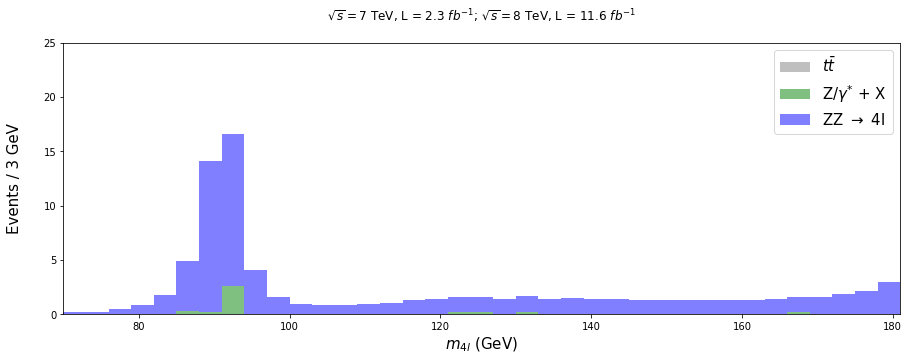

In [11]:
plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Measured data
#data_bar = plt.errorbar(center, CHANGEMETOTHEHISTOGRAMFROMDATA, xerr = CHANGEME, yerr = CHANGEME, linestyle = 'None', color = 'black',
#                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

Before continuing, please fill out the Presemo that you can arrive to [here](https://presemo.helsinki.fi/bsph2006).
A screenshot of the question is shown below

[![Presemo2](https://cern.ch/kirschen/Presemo2.png)](https://presemo.helsinki.fi/bsph2006)

















There are clearly some points in there that don't seem to arise from our simulated processes, with one in particular sticking out. We have left out one item of precomputed data that we can add to the plot. Copy the cell above with the comparison plot and add the `hzz` data defined together with the backgrounds.
Add the Higgs signal to the plot above similarly to the previous ones. If you need help with the options you can untoggle the box below:

<details>
<summary>Click here for help (untoggles hint)</summary>
<code style="white-space:nowrap;">color = 'w', linewidth = 1, edgecolor = 'r', bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV'</code>
</details>

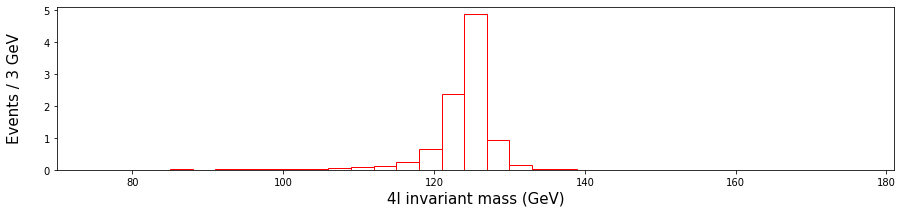

In [12]:
# HZZ, our theoretical assumption of a Higgs via two Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Bonus question: how can something, that seems to have a mass of roughly 125 GeV decay via two Z bosons, with mass over 90 GeV?

Add that in the previous graph and see how it lines up.

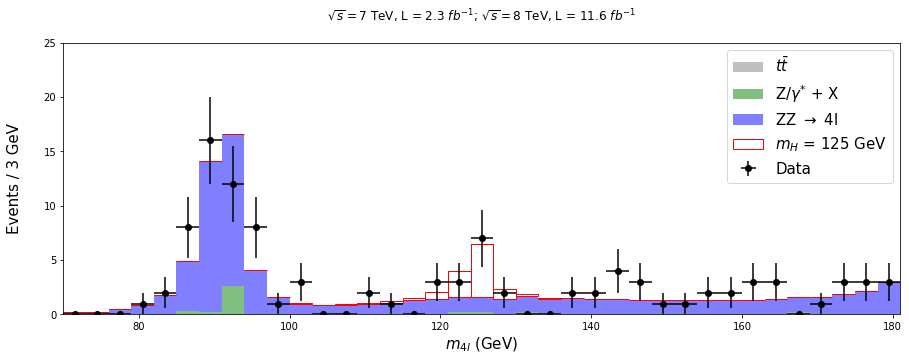

In [13]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

# Bonus (closer look at the data in the .csv and beyond)
 There aren't very many processes that produce four leptons at the end, so getting even this many comprises about half the data that is publicly available from the 2011-2012 run. More precise information about the data can be found from [here](http://opendata.cern.ch/record/5500).
 
 This is already heavily processed data to fit into the short teaching session and we didn't exactly look at all the content of the .csv-file, yet. However, also in "real data analysis", the data formats have become more accessible, cf. [NanoAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD). This format gives essentially a large table of all the high-level objects in the event, e.g. there is a table for electrons, for muons, etc. We could fairly quickly redo a full analysis using uproot to read in the root files. These NanoAOD-files will be available in an upcoming CMS OpenData release as well.
 
 For now, we will stick to the .csv file we have and explore the full content provided (info on leptons and invariant masses of the Z-candidatates and the H-candidate)

In [14]:
# If we take a look at the data, we can see the properties of all four leptons involved.

pd.options.display.max_columns = 50
fourlep.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,PID2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,PID3,E3,px3,py3,pz3,pt3,eta3,phi3,Q3,PID4,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,-1,-13,29.0804,-19.31050,-5.31425,21.0837,20.0284,0.918146,-2.873040,1,13,17.3154,-10.87010,-3.64596,12.9753,11.46530,0.971505,-2.81797,-1,-13,11.49390,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,-1,13,72.1018,15.32840,21.35470,-67.1392,26.2866,-1.667150,0.948222,-1,-13,89.7552,10.34670,-20.27240,86.8214,22.76010,2.048740,-1.09888,1,-13,30.21620,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,-1,-13,68.1611,6.93837,22.85760,63.8382,23.8875,1.709440,1.276090,1,-13,19.5056,4.71517,8.50412,16.9087,9.72383,1.320370,1.06454,1,13,24.83870,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,-1,13,88.3199,85.94400,-16.81970,-11.4510,87.5743,-0.130388,-0.193263,-1,-13,45.0987,-19.98280,-29.14080,-28.0247,35.33410,-0.727298,-2.17188,1,-13,9.79377,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,1,13,39.8417,31.53530,18.85330,15.4088,36.7413,0.407975,0.538835,-1,-13,20.3208,3.30081,16.01250,12.0677,16.34910,0.683619,1.36750,1,13,6.83735,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900


This data set is too small to say anything for certain, but it isn't too far off from actual analysis results. Cf. the official result in this channel used for the Higgs discovery below and an animation of the full data back in the contact session.
<img src = 'http://cds.cern.ch/record/1471016/files/H4l_mass_v3.png' align = 'right'>
